# Capstone Project: Electromobility Data Analysis

## 1. Introduction and Objective

Climate change is one of the greatest threats of the 21st century. It creates a risk for the natural environment as well as for human society. Climate change is associated with more frequent weather extremes, water and food shortages and the loss of ecosystems.  The largest driving force for climate change are greenhouse gas (GHG) emissions. Since 1850, the anthropogenic GHG emissions increased due to economic and population growth. The main source of anthro-pogenic GHG emissions are the combustion of fossil fuels for energy production. [2] 
The energy policy of the European Union aims to reduce GHG emission by at least 55 % by 2030 from 1990 levels. The Paris Agreement aims to limit the global warming to under 2 °C and pursues efforts to limit it to 1.5 °C. [3] The transport sector represents nearly a quarter of EU’s GHG emissions. The highest proportion of the transport emissions (71 % in 2018) can be traced back to road transport. In comparison to other sectors, the transport sector has not shown the same decrease of GHG emissions since 1990. Therefore, the deployment of low-emission alternative energy needs to be raised in the transport sector. [4] The further development of electromobility can play a crucial role for the reduction of GHG emissions if the electrical power is generated by renewable energy sources. [5]


In [46]:
# Hypothesen formulieren
#Land Wie beliebt TRcuk, bus?
#Ladeinfrastruktur, wie verbreitet je Land, Verknüpfung zu Sales? -> mehr bauen
#PHEV, BEV? - wie beleibt je Land, Ladeinfrasturkur
#CO2 Regulatorien im Land, Subventionen für Elektroautos?
#Reichweite?
#Trend Verkäufe über Jahre? - mehr investieren in diese Länder
#Typ von Auto am beliebstesten

## 2. Data Cleaning and Preparation

In [420]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [167]:
electromobility_df=pd.read_csv('IEA Global EV Data 2024.csv') # Source: [6] 

In [ ]:
# leave out, what I did not use

**Data dictionary**:

|column name|content of column| values|
|--------|-------|-------|
|region|country, region or global|Countries, Regions (USA, EU27, Rest of the World) or World|
|category|historical data or forecasts| Historical, Projection-STEPS, Projection-APS|
|parameter|parameter of the value |EV stock (EVs on the road), EV stock share, EV sales share, EV sales, EV charging points|
|mode|differentation of vehicle types|Cars, EV (electric vehicles), Buses, Vans, Trucks|
|powertrain|differentation of powertrain types |EV (electric vehicle), BEV (battery electric vehicle), PHEV (plug-in Habrid electric vehicle), FCEV (Fuel Cell Electric vehicle)|
|year|historical years and forecast|historical (2010-2023), forecast for 2025, 2030 and 2035|
|unit|Definition of the unit of the value column|percent, number of vehicles, number of charging points|
|value|values of the corresponding parameter||ues 

In [332]:
electromobility_df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [171]:
#12654 rows without any missing values
electromobility_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


In [299]:
# Check for missing data: the data set is complete
electromobility_df.isnull().any().sum()

0

In [175]:
# check for diplicates: there are no duplicates
electromobility_df.duplicated().any()

False

In [301]:
# Check the different parameters to which the values relate
electromobility_df.parameter.unique()

array(['EV stock share', 'EV sales share', 'EV sales', 'EV stock',
       'EV charging points', 'Electricity demand', 'Oil displacement Mbd',
       'Oil displacement, million lge'], dtype=object)

In [260]:
# Splitting the DataFrame 'electromobility_df' into one DataFrame per each relevant parameter

# Create DataFrame for EV Sales
EV_sales=electromobility_df[electromobility_df['parameter']=='EV sales']
EV_sales=EV_sales.drop('parameter', axis=1)
EV_sales=EV_sales.drop('unit', axis=1)
EV_sales=EV_sales.rename(columns={"value": "number of vehicles"})

# Create DataFrame for EV Sales Share
EV_sales_share=electromobility_df[electromobility_df['parameter']=='EV sales share']
EV_sales_share=EV_sales_share.drop('parameter', axis=1)
EV_sales_share=EV_sales_share.drop('unit', axis=1)
EV_sales_share=EV_sales_share.rename(columns={"value": "percent of vehicles"})

# Create DataFrame for EV Stock
EV_stock=electromobility_df[electromobility_df['parameter']=='EV stock']
EV_stock=EV_stock.drop('parameter', axis=1)
EV_stock=EV_stock.drop('unit', axis=1)
EV_stock=EV_stock.rename(columns={"value": "number of vehicles"})

# Create DataFrame for EV Stock Share
EV_stock_share=electromobility_df[electromobility_df['parameter']=='EV stock share']
EV_stock_share=EV_stock_share.drop('parameter', axis=1)
EV_stock_share=EV_stock_share.drop('unit', axis=1)
EV_stock_share=EV_stock_share.rename(columns={"value": "percent of vehicles"})

# Create DataFrame for EV Charging Points
EV_charging_points=electromobility_df[electromobility_df['parameter']=='EV charging points']
EV_charging_points=EV_charging_points.drop('parameter', axis=1)
EV_charging_points=EV_charging_points.drop('unit', axis=1)
EV_charging_points=EV_charging_points.rename(columns={"value": "number of charging points"})

In [262]:
EV_sales.head()

,region,category,mode,powertrain,year,number of vehicles
2,Australia,Historical,Cars,BEV,2011,49.0
5,Australia,Historical,Cars,BEV,2012,170.0
9,Australia,Historical,Cars,PHEV,2012,80.0
10,Australia,Historical,Cars,PHEV,2013,100.0
14,Australia,Historical,Cars,BEV,2013,190.0


In [ ]:
# Laden in SQL Datenbank und erneutes Aufrufen hier

## 3. Explorative Data Analysis

In [434]:
# Focus on global and historical EV Sales
EV_sales_h_gl=EV_sales[(EV_sales['category']=='Historical')  & (EV_sales['region']=='World')]

In [520]:
# Create Pivot table for differentiation of powertrains
EV_sales_h_gl_powertrain_pivot = EV_sales_h_gl.pivot_table(index=['region', 'category', 'mode', 'year'], columns='powertrain', values='number of vehicles').reset_index()
EV_sales_h_gl_powertrain_pivot =EV_sales_h_gl_powertrain_pivot.groupby('year')[['BEV', 'PHEV','FCEV']].sum()
EV_sales_h_gl_powertrain_pivot.head()

powertrain,BEV,PHEV,FCEV
year,,,
2010,9837.0,450.0,31.0
2011,44580.0,9160.0,38.0
2012,71528.0,61521.0,30.0
2013,123140.0,92805.0,96.0
2014,215355.0,136020.0,180.0


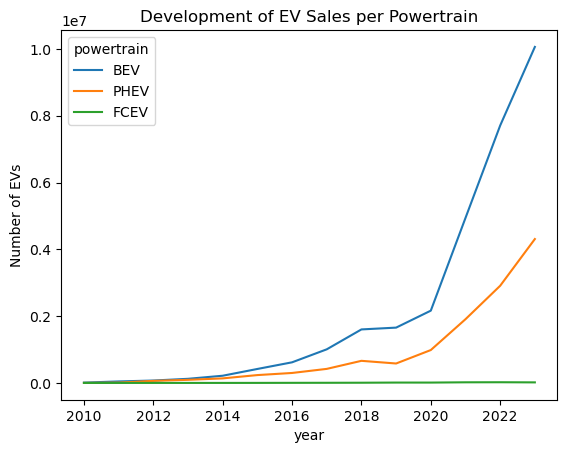

In [514]:
EV_sales_h_gl_powertrain_pivot.plot()
plt.title('Development of EV Sales per Powertrain')
plt.xlabel('year')
plt.ylabel('Number of EVs')
plt.show()

In [ ]:
Weltweit führend: BEV, gefolgt von PHEV, Abknick Sales während Corona Krise
FCEV keine significante Rolle; Stand der Forschung nicht genug

In [390]:
# Create Pivot table for differentiation of powertrains
EV_sales_h_gl_mode_pivot = EV_sales_h_gl.pivot_table(index=['region', 'category', 'powertrain', 'year'], columns='mode', values='number of vehicles').reset_index()
EV_sales_h_gl_mode_pivot =EV_sales_h_gl_mode_pivot.groupby('year')[['Vans', 'Cars','Trucks','Buses']].sum()
EV_sales_h_gl_mode_pivot.head()

mode,Vans,Cars,Trucks,Buses
year,,,,
2010,1702.0,7479.0,37.0,1100.0
2011,3700.0,49038.0,200.0,840.0
2012,11011.0,120030.0,28.0,2010.0
2013,11055.0,201046.0,40.0,3900.0
2014,11105.0,330094.0,55.0,10301.0


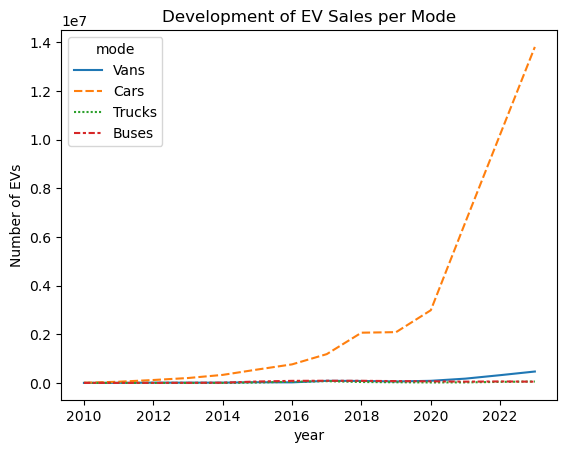

In [424]:
sns.lineplot(data=EV_sales_h_gl_mode_pivot)
plt.title('Development of EV Sales per Mode')
plt.xlabel('year')
plt.ylabel('Number of EVs')
plt.show()

In [ ]:
Cars  werden hauptsache Verkauft, Vans, Trucks und Buses spielen untergeordnete Rolle

In [566]:
EV_sales__share_h_gl=EV_sales_share[(EV_sales_share['category']=='Historical')  & (EV_sales_share['region']=='World')]

In [570]:
EV_sales__share_h_gl.head()

,region,category,mode,powertrain,year,percent of vehicles
11404,World,Historical,Cars,EV,2010,0.01100
11406,World,Historical,Trucks,EV,2010,0.00073
11430,World,Historical,Buses,EV,2010,0.05200
11438,World,Historical,Vans,EV,2010,0.01900
11444,World,Historical,Vans,EV,2011,0.04100


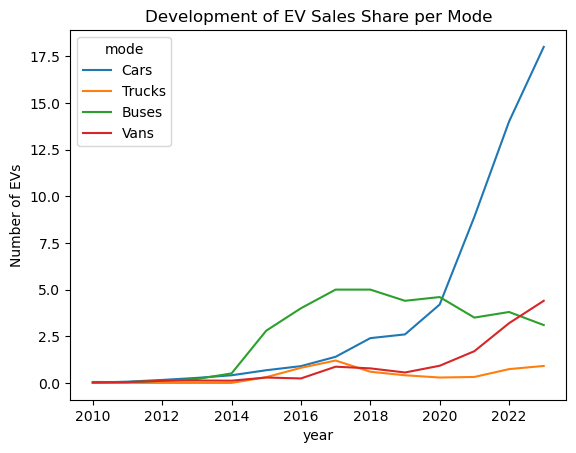

In [576]:
sns.lineplot(data=EV_sales__share_h_gl, x='year', y='percent of vehicles', hue='mode')
plt.title('Development of EV Sales Share per Mode')
plt.xlabel('year')
plt.ylabel('Number of EVs')
plt.show()

In [ ]:
Anteil Cars steigt, Anteil Buses satgniert; wieso nicht attraktiv?
leider keine Infos über Sales Share per Powertrain

In [534]:
# EV stock in 2023
EV_stock_2023=EV_stock[(EV_stock['year']==2023) & (EV_stock['region']=='World') & ((EV_stock['category']=='Historical'))]
EV_stock_2023

,region,category,mode,powertrain,year,number of vehicles
12307,World,Historical,Buses,BEV,2023,650000.0
12308,World,Historical,Buses,FCEV,2023,8700.0
12310,World,Historical,Trucks,FCEV,2023,11000.0
12311,World,Historical,Trucks,PHEV,2023,1300.0
12315,World,Historical,Cars,FCEV,2023,66000.0
12316,World,Historical,Cars,PHEV,2023,12000000.0
12318,World,Historical,Trucks,BEV,2023,330000.0
12354,World,Historical,Cars,BEV,2023,28000000.0
12358,World,Historical,Vans,PHEV,2023,15000.0
12359,World,Historical,Vans,FCEV,2023,3200.0


In [554]:
# Create Pivot table for differentiation of powertrains
EV_stock_2023_mode_pivot = EV_stock_2023.pivot_table(index=['region', 'category', 'mode', 'year'], columns='powertrain', values='number of vehicles').reset_index()
EV_stock_2023_mode_pivot

powertrain,region,category,mode,year,BEV,FCEV,PHEV
0,World,Historical,Buses,2023,650000.0,8700.0,39000.0
1,World,Historical,Cars,2023,28000000.0,66000.0,12000000.0
2,World,Historical,Trucks,2023,330000.0,11000.0,1300.0
3,World,Historical,Vans,2023,1300000.0,3200.0,15000.0


<Axes: xlabel='mode', ylabel='number of vehicles'>

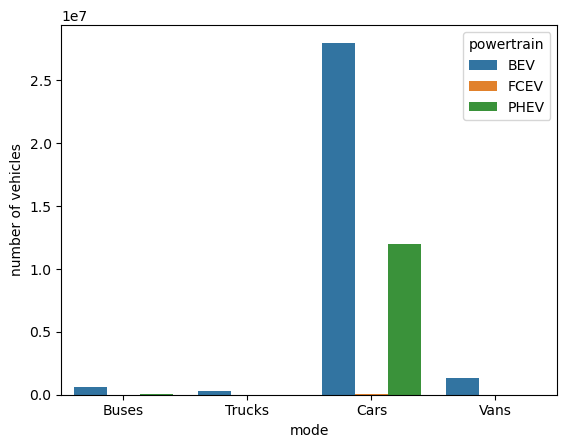

In [540]:
sns.barplot(data=EV_stock_2023, x='mode', y='number of vehicles', hue='powertrain')

In [560]:
# EV stock in 2023
EV_stock_share_2023=EV_stock_share[(EV_stock_share['year']==2023) & (EV_stock_share['region']=='World') & ((EV_stock_share['category']=='Historical'))]
EV_stock_share_2023

,region,category,mode,powertrain,year,percent of vehicles
12313,World,Historical,Buses,EV,2023,3.60
12365,World,Historical,Trucks,EV,2023,0.36
12375,World,Historical,Cars,EV,2023,3.20
12377,World,Historical,Vans,EV,2023,0.85


<Axes: xlabel='mode', ylabel='percent of vehicles'>

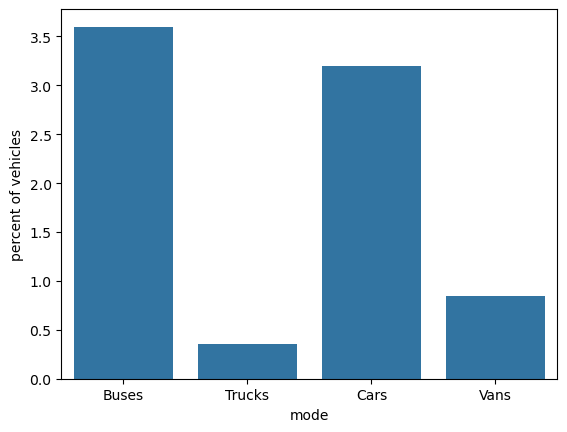

In [564]:
sns.barplot(data=EV_stock_share_2023, x='mode', y='percent of vehicles')

In [ ]:
StockZahlen an Buse ist niedrig, aber höchster elektrifizierter Anteil; grüner ÖPNV ist wichtig für Bekämpfung Klimawandel

In [ ]:
#Correlation between chargign Points and Sales?
#Länder/ Regionen mit höchsten Anteil an EVs, höchster Anteil an EVs Sales vs EV Stock

## 4. Conclusion and Outlook

In [326]:
# Results: hier darstellen und nochmals in PowerBi als Dashboard

In [118]:
# Next steps:
# check subsidies in the countries; influence?
# check References, not all work

**References**: #check if References work

[1] R. K. Pachauri and L. Mayer, eds., Climate change 2014: Synthesis report, Intergovern-mental Panel on Climate Change, Geneva, Switzerland, 2015 

[2] O. Edenhofer, ed., Renewable energy sources and climate change mitigation: Special Re-port of the intergovernmental panel on climate change  Cambridge University Press, Cambridge, 201
 
[3] “European Union, https://ec.europa.eu/clima/policies/international/negotiations/paris_)

[4] “European Union, https://ec.europa.eu/clima/policies/transport_en”

[5] “https://www.eea.europa.eu/data-and-maps/indicators/transport-emissions-of-green-house-gases-7/assessment”


[6] "https://www.iea.org/data-and-statistics/data-product/global-ev-outlook-2024#overview",”.
